In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle

Get the dataframes of the points:

In [2]:
from data.read_data import *
students = get_Students()
square_df = get_square_df()
rhombus_df = get_rhombus_df()
circle_df = get_circle_df()

Load the 'piles' if we already computed them using Patience Sort algorithm:

In [2]:
with open('data/ps_piles_circle.pkl', 'rb') as f:
    circle_piles = pickle.load(f)
with open('data/ps_piles_real_students.pkl', 'rb') as f:
    piles = pickle.load(f)
with open('data/ps_piles_square.pkl', 'rb') as f:
    square_piles = pickle.load(f)
with open('data/ps_piles_rhombus.pkl', 'rb') as f:
    rhombus_piles = pickle.load(f)

The Patience Sort Algorithm

In [3]:
# Function to sort the given array using the patience sorting
def patienceSorting(df):
    sorted_df = df.sort_values(by=df.columns[0])

    piles = []

    for i in tqdm(range(sorted_df.shape[0])):
        if not piles:
            temp = [sorted_df.iloc[i]] 
            piles.append(temp)
        else:
            flag = True

            # Traverse all the piles
            for j in range(len(piles)):
                # Check if the element to be inserted is less than
                # current pile's top
                if sorted_df.iloc[i,1] < piles[j][-1][1]:
                    piles[j].append(sorted_df.iloc[i])

                    # Update flag
                    flag = False
                    break

            # If flag is True
            if flag:
                # Create a new pile
                temp = []

                # Insert current element into temp
                temp.append(sorted_df.iloc[i])

                # Insert current pile into all the piles
                piles.append(temp)


    return piles

Plot the piles:
The x-axis: Pile number
The y-axis: The length of the Pile 

In [8]:
def plot_piles(piles, filename, title):
    lists_lengths = [len(sublist) for sublist in piles]
    list_indices = range(len(piles))
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a bar plot
    ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')
    
    # Create a line plot
    ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')
    
    # Set x-axis ticks to match list indices
    ax.set_xticks(list_indices)
    
    # Set labels and title
    ax.set_xticks(range(0, len(piles), 100))
    ax.set_xlabel('Pile Number')
    ax.set_ylabel('Length of Piles')
    ax.set_title('Patience Sort Algorithm - ' + title )
    ax.grid(False)
    plt.savefig("plots/png/PS_"+ filename +".png") # save as png
    plt.savefig("plots/pdf/PS_"+ filename +".pdf") # save as pdf
    
    plt.show()

Plot the points in their distribution, divided to colors by Piles 

In [9]:
def plot_points_by_piles(piles, filename, title):    
    # Define color palette with 10 colors
    palette = sns.color_palette("husl", 10)
    
    # Calculate the number of piles
    num_piles = len(piles)
    
    plt.figure(figsize=(7, 7))
    all_points_x = []
    all_points_y = []
    colors = []

    # Pre-calculate colors for all piles
    color_indices = [min(int(10 * i / num_piles), 9) for i in range(num_piles)]
    for i, (pile, color_index) in tqdm(enumerate(zip(piles, color_indices))):
        color = palette[color_index]
        colors.extend([color] * len(pile))
        for df in pile:
            all_points_x.extend([df[0]])
            all_points_y.extend([df[1]])

    # Plot all points at once
    plt.scatter(all_points_x, all_points_y, color=colors, s=1)

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Piles in Patience Sort - ' + title)

    # Save plot as png and pdf
    plt.savefig("plots/png/PS_" + filename + "_piles_distribution.png")
    plt.savefig("plots/pdf/PS_" + filename + "_piles_distribution.pdf")

    # Show plot
    plt.show()
    

Compute the piles on the different datasets:

In [4]:
piles = patienceSorting(students)

100%|██████████| 136939/136939 [33:49<00:00, 67.46it/s]   


In [ ]:
square_piles = patienceSorting(square_df)

In [ ]:
rhombus_piles = patienceSorting(rhombus_df)

In [ ]:
circle_piles = patienceSorting(circle_df)

Save piles into pickle files:

In [ ]:
with open('ps_piles_real_students.pkl', 'wb') as f:
    pickle.dump(piles, f)
    
with open('ps_piles_square.pkl', 'wb') as f:
    pickle.dump(square_piles, f)
    
with open('ps_piles_rhombus.pkl', 'wb') as f:
    pickle.dump(rhombus_piles, f)
    
with open('ps_piles_circle.pkl', 'wb') as f:
    pickle.dump(circle_piles, f)

Plot all the piles:

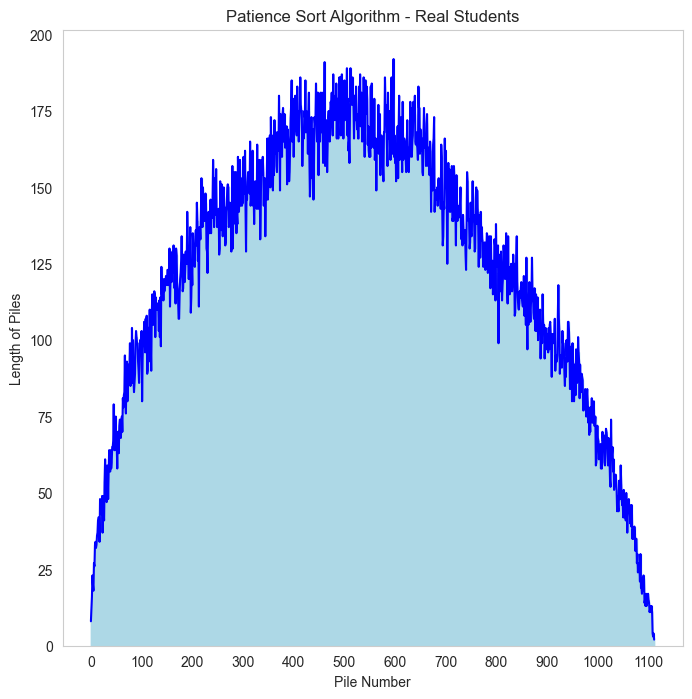

1112it [00:00, 2093.95it/s]


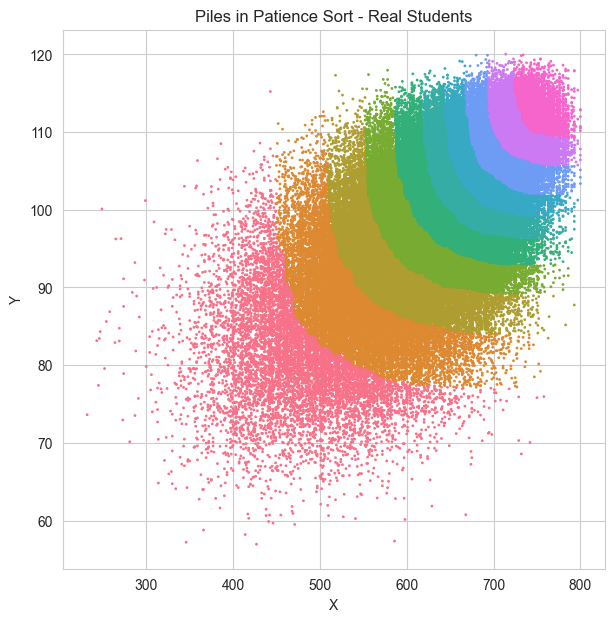

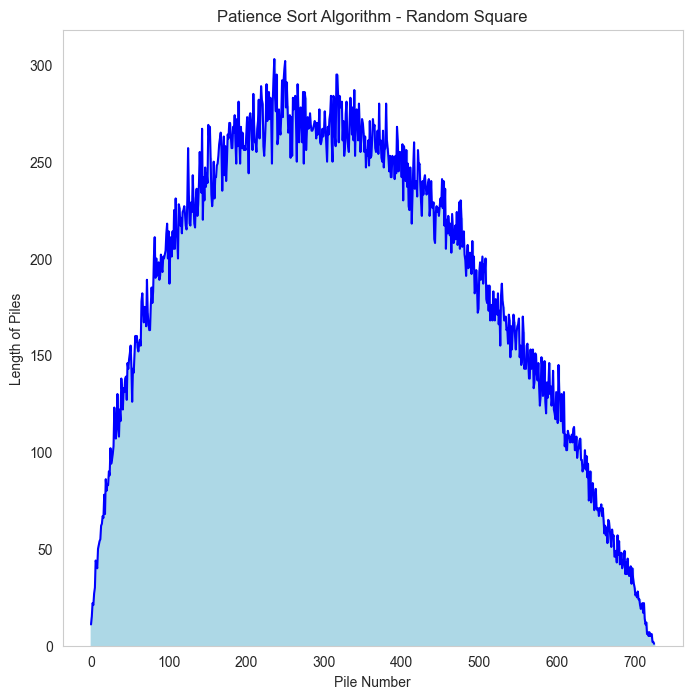

0it [00:00, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_x.extend([df[0]])
C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_y.extend([df[1]])
726it [00:02, 287.80it/s]


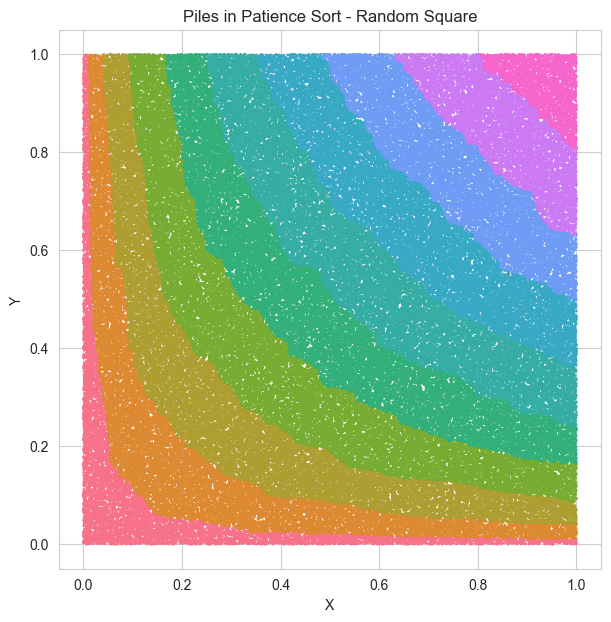

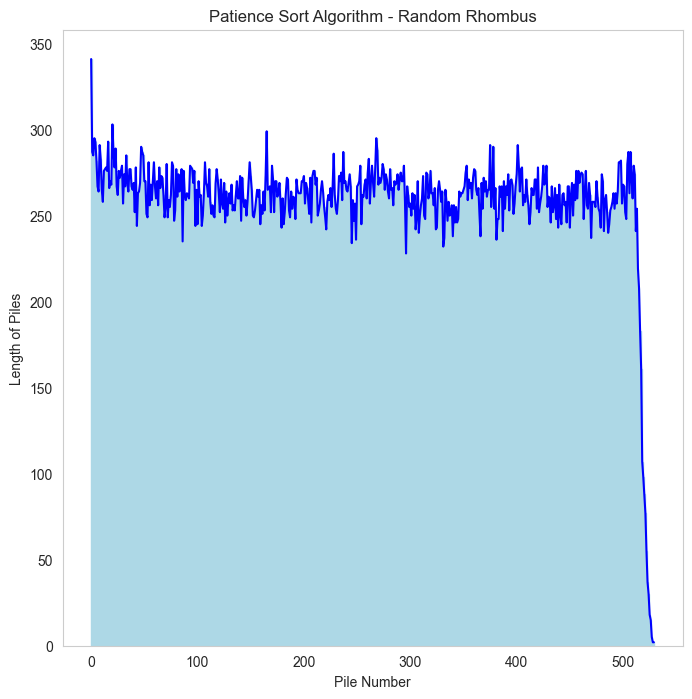

0it [00:00, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_x.extend([df[0]])
C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_y.extend([df[1]])
530it [00:02, 217.27it/s]


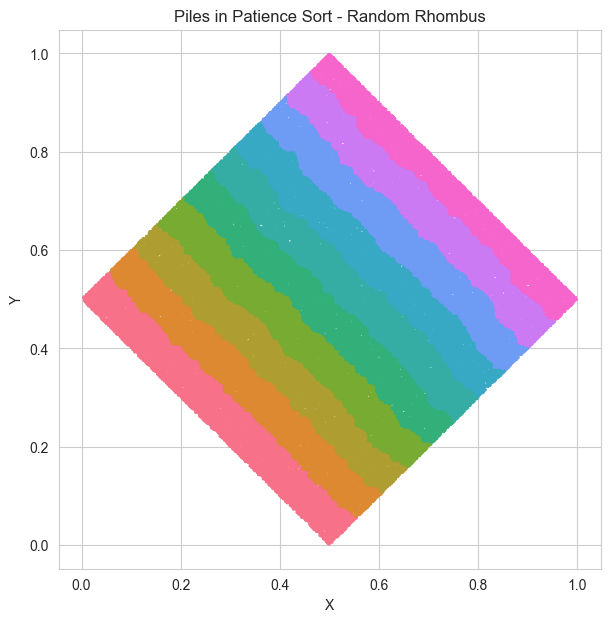

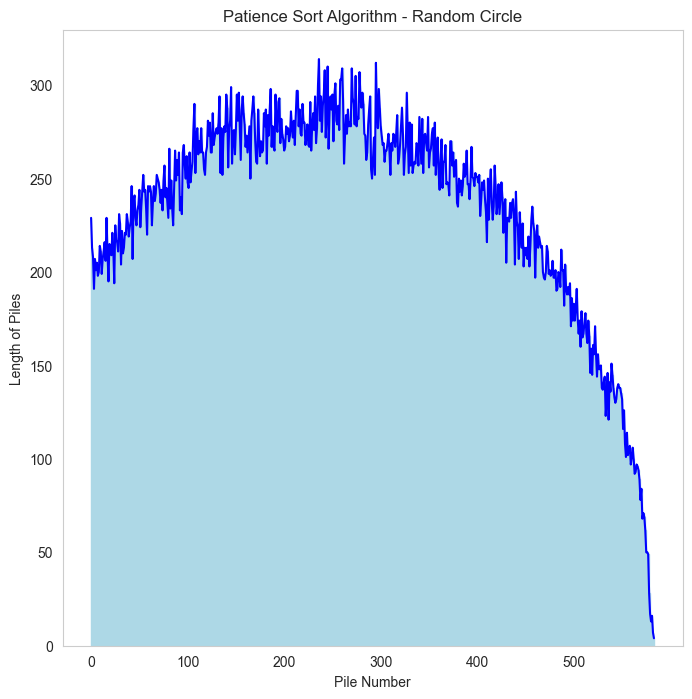

0it [00:00, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_x.extend([df[0]])
C:\Users\rotem\AppData\Local\Temp\ipykernel_12528\3480067727.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_points_y.extend([df[1]])
584it [00:02, 220.89it/s]


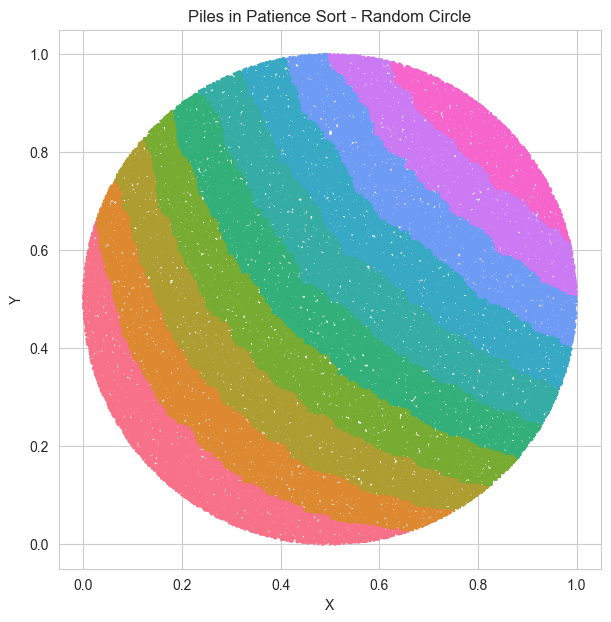

In [10]:
plot_piles(piles, "real_students", "Real Students")
plot_points_by_piles(piles, "real_students", "Real Students")

plot_piles(square_piles, "random_square", "Random Square")
plot_points_by_piles(square_piles, "random_square", "Random Square")

plot_piles(rhombus_piles, "random_rhombus", "Random Rhombus")
plot_points_by_piles(rhombus_piles, "random_rhombus", "Random Rhombus")

plot_piles(circle_piles, "random_circle", "Random Circle")
plot_points_by_piles(circle_piles, "random_circle", "Random Circle")